# K-Means Clustering
> A Summary of lecture "Cluster Analysis in Python", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine Learning]
- image: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Basics of k-means clustering
- Why k-means clustering?
    - A critical drawback of hierarchical clustering: runtime
    - K means runs significantly fater on large datasets
- K-means clustering
    - Generate cluster centers
    - Generate cluster labels

### K-means clustering: first exercise
This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.

Recall the two steps of k-means clustering:

- Define cluster centers through ```kmeans()``` function. It has two required arguments: observations and number of clusters.
- Assign cluster labels through the ```vq()``` function. It has two required arguments: observations and cluster centers.

- Preprocess

In [2]:
comic_con = pd.read_csv('./dataset/comic_con.csv', index_col=0)
comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


In [3]:
from scipy.cluster.vq import whiten

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

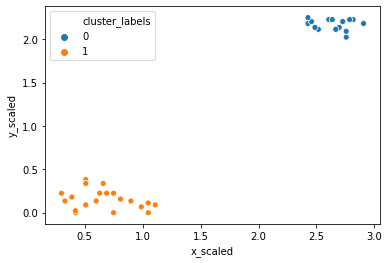

In [5]:
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortions = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

### Runtime of k-means clustering
Recall that it took a significantly long time to run hierarchical clustering. How long does it take to run the kmeans() function on the FIFA dataset?

- Preprocess

In [6]:
fifa = pd.read_csv('./dataset/fifa_18_dataset.csv')
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [7]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

In [9]:
from scipy.cluster.hierarchy import linkage

%timeit linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='ward')

7.23 s ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 2)

68.7 ms ± 887 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## How many clusters?
- How to find the right k?
    - No absolute method to find right number of clusters(k) in k-means clustering
    - Elbow method
- Distortion
![distortion](image/distortion.png)
    - sum of squared distances of points from cluster centers
    - Decreases with an increasing number of clusters
    - Becomes zero when the number of clusters equals the numbers of points
    - Elbow plot: line plot between cluster centers and distortion
- Elbow method
    - Elbow plot helps indicate number of clusters present in data
    - Only gives an indication of optimal k
    - Does not always pinpoint how many k
    - Other methods : average silhouette, gap statistic

### Elbow method on distinct clusters
Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.

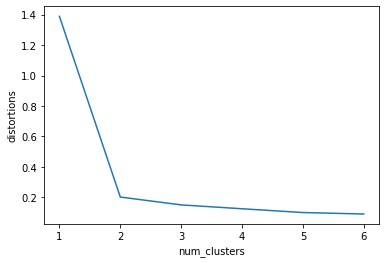

In [13]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)
    
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot);
plt.xticks(num_clusters);

### Elbow method on uniform data
In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a data set with uniformly distributed points. You may want to display the data points on the console before proceeding with the exercise.

- Preprocess

In [15]:
uniform_data = pd.read_csv('./dataset/uniform_data.csv', index_col=0)
uniform_data.head()

,x_coordinate,y_coordinate
0,39,3
1,42,7
2,58,3
3,43,3
4,13,6


In [16]:
uniform_data['x_scaled'] = whiten(uniform_data['x_coordinate'])
uniform_data['y_scaled'] = whiten(uniform_data['y_coordinate'])

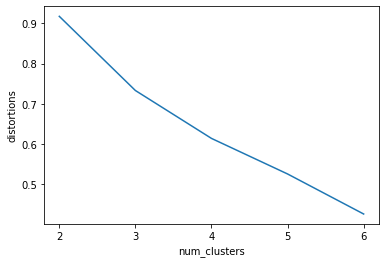

In [17]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)
    
# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot);
plt.xticks(num_clusters);

## Limitations of k-means clustering
- Limitations of k-means clustering
    - How to find the right K
    - Impact of seeds
    - Biased towards equal sized clusters

### Impact of seeds on distinct clusters
You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.



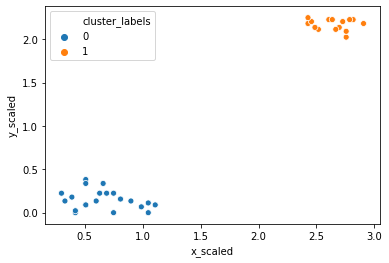

In [21]:
# Initialize seed
np.random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

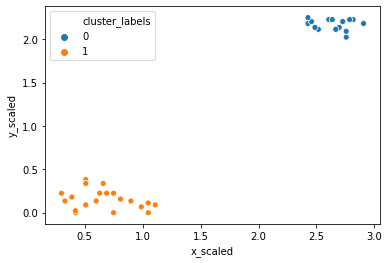

In [22]:
# Initialize seed
np.random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=comic_con);

### Uniform clustering patterns
Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.

Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.

- preprocess

In [23]:
mouse = pd.read_csv('./dataset/mouse.csv', index_col=0)
mouse.head()

,x_coordinate,y_coordinate
0,33.875528,44.893421
1,38.208748,41.116327
2,35.740588,57.418006
3,32.546963,57.218082
4,62.063146,47.196944


In [24]:
mouse['x_scaled'] = whiten(mouse['x_coordinate'])
mouse['y_scaled'] = whiten(mouse['y_coordinate'])

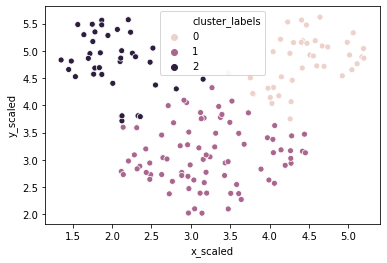

In [26]:
# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=mouse);

### FIFA 18: defenders revisited
In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:

- defending: a number which signifies the defending attributes of a player
- physical: a number which signifies the physical attributes of a player

These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.

- Preprocess

In [32]:
fifa = pd.read_csv('./dataset/fifa_18_sample_data.csv')
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [33]:
fifa = fifa[['def', 'phy']].copy()

In [34]:
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

In [ ]:
# Setup a random seed in numpy
np.random.seed([1000, 2000])

# Fit the data into a k-means algorithm
cluster_centers, _ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'] = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels'),mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)